In [1]:
import pandas as pd
tab = pd.read_csv('../../data/heston_dor.csv',sep=',')

In [2]:
import numpy as np

In [3]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [4]:
col = [str(i) for i in range(5,5+88)]

In [5]:
tab.head(5)

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,0.016840,-0.124106,0.876229,0.164721,9.580288,0.351275,0.321272,0.294827,0.272889,0.258973,...,0.391454,0.391977,0.392578,0.393221,0.393885,0.394556,0.395226,0.395891,0.396546,0.397191
1,0.015854,-0.266165,0.140586,0.165832,7.190494,0.303108,0.235170,0.235567,0.237021,0.239069,...,0.392158,0.392608,0.393003,0.393357,0.393676,0.393969,0.394238,0.394487,0.394720,0.394938
2,0.011428,-0.337197,0.864070,0.052406,8.424803,0.334141,0.247264,0.215370,0.183602,0.152755,...,0.207557,0.209541,0.212320,0.215543,0.218976,0.222469,0.225933,0.229315,0.232585,0.235730
3,0.018240,-0.164814,0.952380,0.141195,9.059640,0.347968,0.314932,0.284821,0.258275,0.239569,...,0.359349,0.360200,0.361182,0.362233,0.363318,0.364413,0.365505,0.366585,0.367648,0.368690
4,0.003158,-0.422433,0.988612,0.111454,7.498527,0.298448,0.253565,0.222731,0.193363,0.169673,...,0.298614,0.302998,0.307304,0.311453,0.315409,0.319165,0.322723,0.326092,0.329283,0.332309


In [6]:
np.shape(tab)

(12000, 93)

In [7]:
features_dataset = tab.drop(columns=col)
labels_dataset = tab.drop(columns=['0','1','2','3','4'])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_dataset, labels_dataset, test_size=0.15, random_state=42)

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale1=  StandardScaler()
y_train_transform = scale.fit_transform(y_train)
y_test_transform = scale.transform(y_test)
x_train_transform = scale1.fit_transform(X_train)
x_test_transform = scale1.transform(X_test)

In [9]:
X_train.head(5)

,0,1,2,3,4
8933,0.009083,-0.166628,0.093578,0.184929,2.174483
4122,0.005368,-0.658318,0.119319,0.199931,8.063958
4807,0.023112,-0.246583,0.777880,0.156305,9.704601
6211,0.030216,-0.101042,0.992489,0.156289,9.494351
7928,0.030184,-0.829353,0.061386,0.123217,6.891315


In [10]:
y_train.head(5)

,5,6,7,8,9,10,11,12,13,14,...,83,84,85,86,87,88,89,90,91,92
8933,0.311893,0.226829,0.162880,0.161626,0.161800,0.163128,0.165218,0.167742,0.170466,0.173247,...,0.378533,0.378979,0.379389,0.379768,0.380121,0.380451,0.380762,0.381056,0.381335,0.381600
4122,0.311940,0.235094,0.240143,0.246018,0.251334,0.256152,0.260535,0.264542,0.268224,0.271624,...,0.429742,0.430547,0.431245,0.431861,0.432413,0.432912,0.433368,0.433787,0.434176,0.434537
4807,0.323462,0.298445,0.277314,0.261811,0.255693,0.261731,0.275910,0.292396,0.308458,0.323325,...,0.378391,0.379838,0.381209,0.382506,0.383734,0.384898,0.386003,0.387055,0.388059,0.389018
6211,0.377378,0.343911,0.313828,0.287870,0.269812,0.266856,0.278951,0.296877,0.315113,0.332093,...,0.382320,0.382584,0.383021,0.383564,0.384175,0.384828,0.385506,0.386197,0.386894,0.387591
7928,0.311963,0.237226,0.221845,0.227188,0.231815,0.235882,0.239503,0.242760,0.245716,0.248418,...,0.338119,0.338890,0.339557,0.340146,0.340671,0.341147,0.341580,0.341979,0.342347,0.342691


In [11]:
np.shape(X_train), np.shape(X_test)

((10200, 5), (1800, 5))

In [12]:
def xtransform(X_train,X_test):
    return [scale1.transform(X_train),scale1.transform(X_test)]

    
[x_train_transform,x_test_transform]=xtransform(X_train,X_test)

def xinversetransform(x):
    return scale.inverse_transform(x)

In [13]:
ub=[0.04,-0.1,1.0,0.2,10.0]
lb=[0.0001,-0.95,0.01,0.01,1]
def myscale(x):
    res=np.zeros(5)
    for i in range(5):
        res[i]=(x[i] - (ub[i] + lb[i])*0.5) * 2 / (ub[i] - lb[i])    
    return res

def myinverse(x):
    res=np.zeros(5)
    for i in range(5):
        res[i]=x[i]*(ub[i] - lb[i]) *0.5 + (ub[i] + lb[i])*0.5  
    return res

In [14]:
x_train_transform.shape

(10200, 5)

In [15]:
y_test_transform.shape

(1800, 88)

In [16]:
#y_train_transform = np.array([myscale(y) for y in y_train])
#y_test_transform = np.array([myscale(y) for y in y_test])

In [17]:
y_train_transform.shape

(10200, 88)

In [18]:
x_test_transform.shape,y_test_transform.shape

((1800, 5), (1800, 88))

## Papier 2

In [19]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(5,)),
        tf.keras.layers.Dense(30,activation = 'elu'),
        tf.keras.layers.Dense(30,activation = 'elu'),
        tf.keras.layers.Dense(30,activation = 'elu'),
        tf.keras.layers.Dense(88,activation = 'linear')
    ])

    def root_mean_squared_error(y_true, y_pred):
        return tf.math.sqrt(tf.reduce_mean(tf.math.square(y_pred - y_true)))
    
    model.compile(loss = root_mean_squared_error, optimizer = "adam" ,metrics=['mae','mse'])
    
    return model

In [44]:
model = build_model()

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                180       
_________________________________________________________________
dense_5 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_6 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_7 (Dense)              (None, 88)                2728      
Total params: 4,768
Trainable params: 4,768
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(x_train_transform, y_train_transform, validation_data = (x_test_transform, y_test_transform), epochs = 500, batch_size=32)

Train on 10200 samples, validate on 1800 samples
Epoch 1/500
10200/10200 [==============================] - 1s 70us/sample - loss: 0.3324 - mae: 0.2413 - mse: 0.1617 - val_loss: 0.1760 - val_mae: 0.1125 - val_mse: 0.0314
Epoch 2/500
10200/10200 [==============================] - 0s 40us/sample - loss: 0.1475 - mae: 0.0900 - mse: 0.0223 - val_loss: 0.1359 - val_mae: 0.0797 - val_mse: 0.0189
Epoch 3/500
10200/10200 [==============================] - 0s 38us/sample - loss: 0.1182 - mae: 0.0695 - mse: 0.0144 - val_loss: 0.1086 - val_mae: 0.0667 - val_mse: 0.0120
Epoch 4/500
10200/10200 [==============================] - 0s 38us/sample - loss: 0.0973 - mae: 0.0583 - mse: 0.0098 - val_loss: 0.0921 - val_mae: 0.0558 - val_mse: 0.0087
Epoch 5/500
10200/10200 [==============================] - 0s 39us/sample - loss: 0.0833 - mae: 0.0494 - mse: 0.0072 - val_loss: 0.0784 - val_mae: 0.0463 - val_mse: 0.0063
Epoch 6/500
10200/10200 [==============================] - 0s 37us/sample - loss: 0.0746 - 

In [47]:
loss, mae, mse = model.evaluate(x_test_transform, y_test_transform, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

1800/1800 - 0s - loss: 0.0258 - mae: 0.0120 - mse: 6.8548e-04
Testing set Mean Abs Error:  0.01 MPG


Text(0, 0.5, 'MSE')

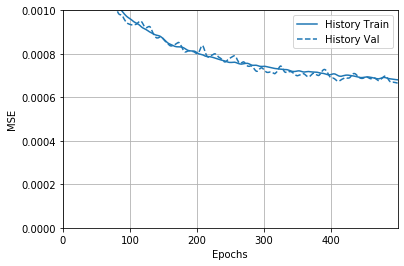

In [48]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'History': history}, metric = "mse")
plt.ylim([0,0.001])
plt.ylabel('MSE')


In [24]:
x_test_transform[1250].reshape(1,5)

array([[ 0.30678253, -0.32841243,  0.5897173 , -1.91192873,  0.81697685]])

In [25]:
pred = xinversetransform(model.predict(x_test_transform[1250].reshape(1,5)))

In [26]:
pred

array([[0.3108948 , 0.24637875, 0.21793331, 0.1898825 , 0.16647723,
        0.17469415, 0.21351048, 0.24737085, 0.27492288, 0.29802594,
        0.3176645 , 0.24662517, 0.22317125, 0.20439719, 0.19181935,
        0.19078265, 0.20432831, 0.22479367, 0.245385  , 0.2640831 ,
        0.28072482, 0.2955678 , 0.2213285 , 0.20992324, 0.2038548 ,
        0.2041381 , 0.21051158, 0.22081147, 0.23274387, 0.24482785,
        0.25637105, 0.2671513 , 0.27713782, 0.21325609, 0.20899251,
        0.20916401, 0.21314003, 0.21968728, 0.22760923, 0.23602127,
        0.24439982, 0.25247166, 0.26011774, 0.26731512, 0.21184431,
        0.2116151 , 0.21432981, 0.21904342, 0.22489528, 0.23126252,
        0.2377391 , 0.24408951, 0.2501977 , 0.25601226, 0.2615118 ,
        0.2129694 , 0.21478336, 0.21838531, 0.22302651, 0.22817783,
        0.2334893 , 0.23876095, 0.24387264, 0.24877007, 0.25343126,
        0.25785062, 0.21493566, 0.21772346, 0.22155498, 0.22590788,
        0.23045315, 0.23500402, 0.2394399 , 0.24